## MMM Macro Data ##

This document aims to build a synthetic macro data for the Marketing Mix Modeling tool our project team is working on. The data fields are date of year level and belong to two wide groups: 

* Marketing Spend Data: The level of investment on marketing channels such as Search, Display, TV, Radio
* External Factor Data: Data on external factors potentially correlated to consumer decisions.

In [1]:
# install the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta


In [2]:
# install the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta


In [3]:
# 1. Create a daily date range throughout 2023 & 2024
start_date = "2023-01-01"
end_date   = "2024-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# 2. Initialize a DataFrame with a Date column
df = pd.DataFrame({"Date": dates})

In [4]:
# Extracting useful time columns for EDA & modelling precision

# df["Week"] = df["Date"].apply(lambda x: x.isocalendar()[1]) # week number
df["Month"] = df["Date"].apply(lambda x: x.month) # month of the date
df["Year"] = df["Date"].apply(lambda x: x.year) # year of the date
df["Weekday"] = df["Date"].apply(lambda x: x.weekday()) # weekday of the date

In [5]:
# creating a table for the macro data

# trend factor
# inflation rate
# promotion_month
# monthly average weather forecast: Berlin
# consumer index
# competitor spend index 

external_factors = pd.DataFrame({
    "Year": [2023]*12 + [2024]*12,
    "Month": list(range(1, 13)) + list(range(1, 13)),
    # highlighting trend factor to add seasonality to randomized spend data per channel
    "Trend_Factor": [
        1.05, 1.20, 1.10, 1.15, 1.30, 1.20, 1.30, 1.3, 1.5, 1.8, 2.1, 1.8,  # 2023
        1.35, 1.25, 1.20, 1.25, 1.38, 1.35, 1.40, 1.3, 1.7, 2.0, 2.3, 1.7   # 2024
    ],
    # Highlighting the months with promotion to catch the seasonality
    "Promo_Exists": [
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,  # 2023
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,   # 2024
    ],
    # Consumer Durable Goods Price Index. Source: https://www.destatis.de/EN/Themes/Economy/Prices/Consumer-Price-Index/Tables/Consumer-prices-special.html#242184
    "Consumer_Index": [
        110.7, 111.1, 112.5, 113, 113.2, 113.4, 112.6, 113.2, 114.1, 114.6, 114.5, 114.5,  # 2023
        113.3, 114, 114.5, 114.6, 114.3, 114.1, 113.3, 113.2, 114.2, 114.8, 115.1, 115.1   # 2024
    ],
    # Inflation Rate monthly average in Germany. Source: Statista - https://www.statista.com/statistics/1312145/germany-inflation-rate-central-bank-rate-monthly/
    "Inflation_Rate": [
        8.7, 8.7, 7.4, 7.2, 6.1, 6.4, 6.2, 6.1, 4.5, 3.8, 3.2, 3.7,  # 2023
        2.9, 2.5, 2.2, 2.2, 2.4, 2.2, 2.3, 1.9, 1.6, 2.0, 2.6, 2.6  # 2024
    ]
})

external_factors

,Year,Month,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate
0,2023,1,1.05,0,110.7,8.7
1,2023,2,1.20,0,111.1,8.7
2,2023,3,1.10,0,112.5,7.4
3,2023,4,1.15,1,113.0,7.2
4,2023,5,1.30,0,113.2,6.1
5,2023,6,1.20,0,113.4,6.4
6,2023,7,1.30,1,112.6,6.2
7,2023,8,1.30,0,113.2,6.1
8,2023,9,1.50,1,114.1,4.5
9,2023,10,1.80,1,114.6,3.8


In [6]:
# creating a monthly budget framework by introducing factors on each channel

spend_factors = pd.DataFrame({
    "Year": [2023]*12 + [2024]*12,
    "Month": list(range(1, 13)) + list(range(1, 13)),
    "Budget_Factor": np.random.randint(1000000,2000000, size=24),
    "Search_Factor": np.random.randint(45,55, size=24)/100,
    "Display_Factor": np.random.randint(4,8, size=24)/100,
    "Video_Factor": np.random.randint(6,10, size=24)/100,
    "Social_Factor": np.random.randint(4,8, size=24)/100,
    "Digital_Audio_Factor": np.random.randint(4,8, size=24)/100,
    "TV_Factor": np.random.randint(12,20, size=24)/100,
    "Radio_Factor": np.random.randint(4,6, size=24)/100,
    "OOH_Factor": np.random.randint(4,8, size=24)/100,
    "GRP_Factor": np.random.randint(60,120, size=24)
    
})

spend_factors.head()

,Year,Month,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023,1,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
1,2023,2,1097954,0.46,0.05,0.09,0.06,0.07,0.14,0.04,0.04,69
2,2023,3,1635289,0.49,0.04,0.08,0.06,0.07,0.12,0.05,0.06,76
3,2023,4,1992709,0.47,0.05,0.09,0.06,0.07,0.17,0.05,0.06,105
4,2023,5,1654964,0.54,0.07,0.08,0.07,0.05,0.12,0.04,0.05,74


In [7]:
# joining external factors and spend factors table to figure out the monthly budget per channel

factors = external_factors.merge(spend_factors, on = ["Year", "Month"], how="left")
factors.head()

,Year,Month,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023,1,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
1,2023,2,1.20,0,111.1,8.7,1097954,0.46,0.05,0.09,0.06,0.07,0.14,0.04,0.04,69
2,2023,3,1.10,0,112.5,7.4,1635289,0.49,0.04,0.08,0.06,0.07,0.12,0.05,0.06,76
3,2023,4,1.15,1,113.0,7.2,1992709,0.47,0.05,0.09,0.06,0.07,0.17,0.05,0.06,105
4,2023,5,1.30,0,113.2,6.1,1654964,0.54,0.07,0.08,0.07,0.05,0.12,0.04,0.05,74


In [8]:
# joining the factors table into the daily df table

daily_df = df.merge(factors, on =["Year","Month"], how="left")
daily_df.head()

,Date,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,Video_Factor,Social_Factor,Digital_Audio_Factor,TV_Factor,Radio_Factor,OOH_Factor,GRP_Factor
0,2023-01-01,1,2023,6,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
1,2023-01-02,1,2023,0,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
2,2023-01-03,1,2023,1,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
3,2023-01-04,1,2023,2,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66
4,2023-01-05,1,2023,3,1.05,0,110.7,8.7,1255847,0.45,0.04,0.06,0.05,0.06,0.14,0.04,0.07,66


In [9]:
# introduce daily spend per channel based on the factors

# introduce parameters in case of any fine-tuning needed

lower = 0.85
upper = 1.15

# copying the data table not to lose any changes

daily_dff = daily_df.copy()

# define daily spend levels with an additional randomization

#Search 
daily_dff["Search_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Search_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Display
daily_dff["Display_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Display_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Video
daily_dff["Video_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Video_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Social
daily_dff["Social_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Social_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Digital Audio
daily_dff["Digital_Audio_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Digital_Audio_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

# TV
daily_dff["TV_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["TV_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

# Radio
daily_dff["Radio_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["Radio_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#OOH 
daily_dff["OOH_Spend"] = daily_dff["Budget_Factor"] * daily_dff["Trend_Factor"] * daily_dff["OOH_Factor"] * np.random.uniform(lower, upper, size=len(daily_dff)) / 30

#Gross Rating Point
daily_dff["Gross_Rating_Point"] = daily_dff["GRP_Factor"] * daily_dff["Trend_Factor"]

daily = daily_dff

## Exploratory Data Analysis ##

In [10]:
# Get data screenshot
daily.describe()

,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,Display_Factor,...,GRP_Factor,Search_Spend,Display_Spend,Video_Spend,Social_Spend,Digital_Audio_Spend,TV_Spend,Radio_Spend,OOH_Spend,Gross_Rating_Point
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,2023.500684,2.997264,1.457907,0.500684,113.667031,4.131874,1.583079e+06,0.491354,0.052531,...,85.506156,38020.655555,4084.660422,5928.167853,4691.876586,4385.963785,11240.366793,3366.903300,4224.381918,124.352052
std,3.451913,0.500342,2.004787,0.327242,0.500342,1.108149,2.252173,2.520215e+05,0.026539,0.010561,...,16.624405,12248.245103,1606.995032,1803.617319,1673.617779,1641.106906,3694.161996,1126.519904,1877.095779,34.958874
min,1.000000,2023.000000,0.000000,1.050000,0.000000,110.700000,1.600000,1.097954e+06,0.450000,0.040000,...,60.000000,17122.749016,1529.976262,2252.682316,1872.087874,1853.345729,5231.338253,1505.019168,1532.941178,69.300000
25%,4.000000,2023.000000,1.000000,1.250000,0.000000,113.200000,2.250000,1.371197e+06,0.470000,0.040000,...,74.000000,29074.495081,2888.952717,4656.364084,3581.610223,3300.465460,8129.685078,2485.286416,2920.847536,97.200000
50%,7.000000,2024.000000,3.000000,1.350000,1.000000,114.100000,2.900000,1.586427e+06,0.490000,0.050000,...,83.000000,35770.556696,3741.786784,5414.804878,4293.887981,4264.380681,11141.142816,3204.166209,3683.641698,128.700000
75%,10.000000,2024.000000,5.000000,1.700000,1.000000,114.500000,6.100000,1.781709e+06,0.520000,0.060000,...,100.000000,44134.883194,4922.433060,7077.171957,5710.702848,5128.080933,13740.184286,4106.322041,4882.738351,143.000000
max,12.000000,2024.000000,6.000000,2.300000,1.000000,115.100000,8.700000,1.999284e+06,0.540000,0.070000,...,118.000000,74957.885966,8912.954399,10569.350257,9627.945594,11703.749781,21507.754523,6576.184016,10019.112272,200.600000


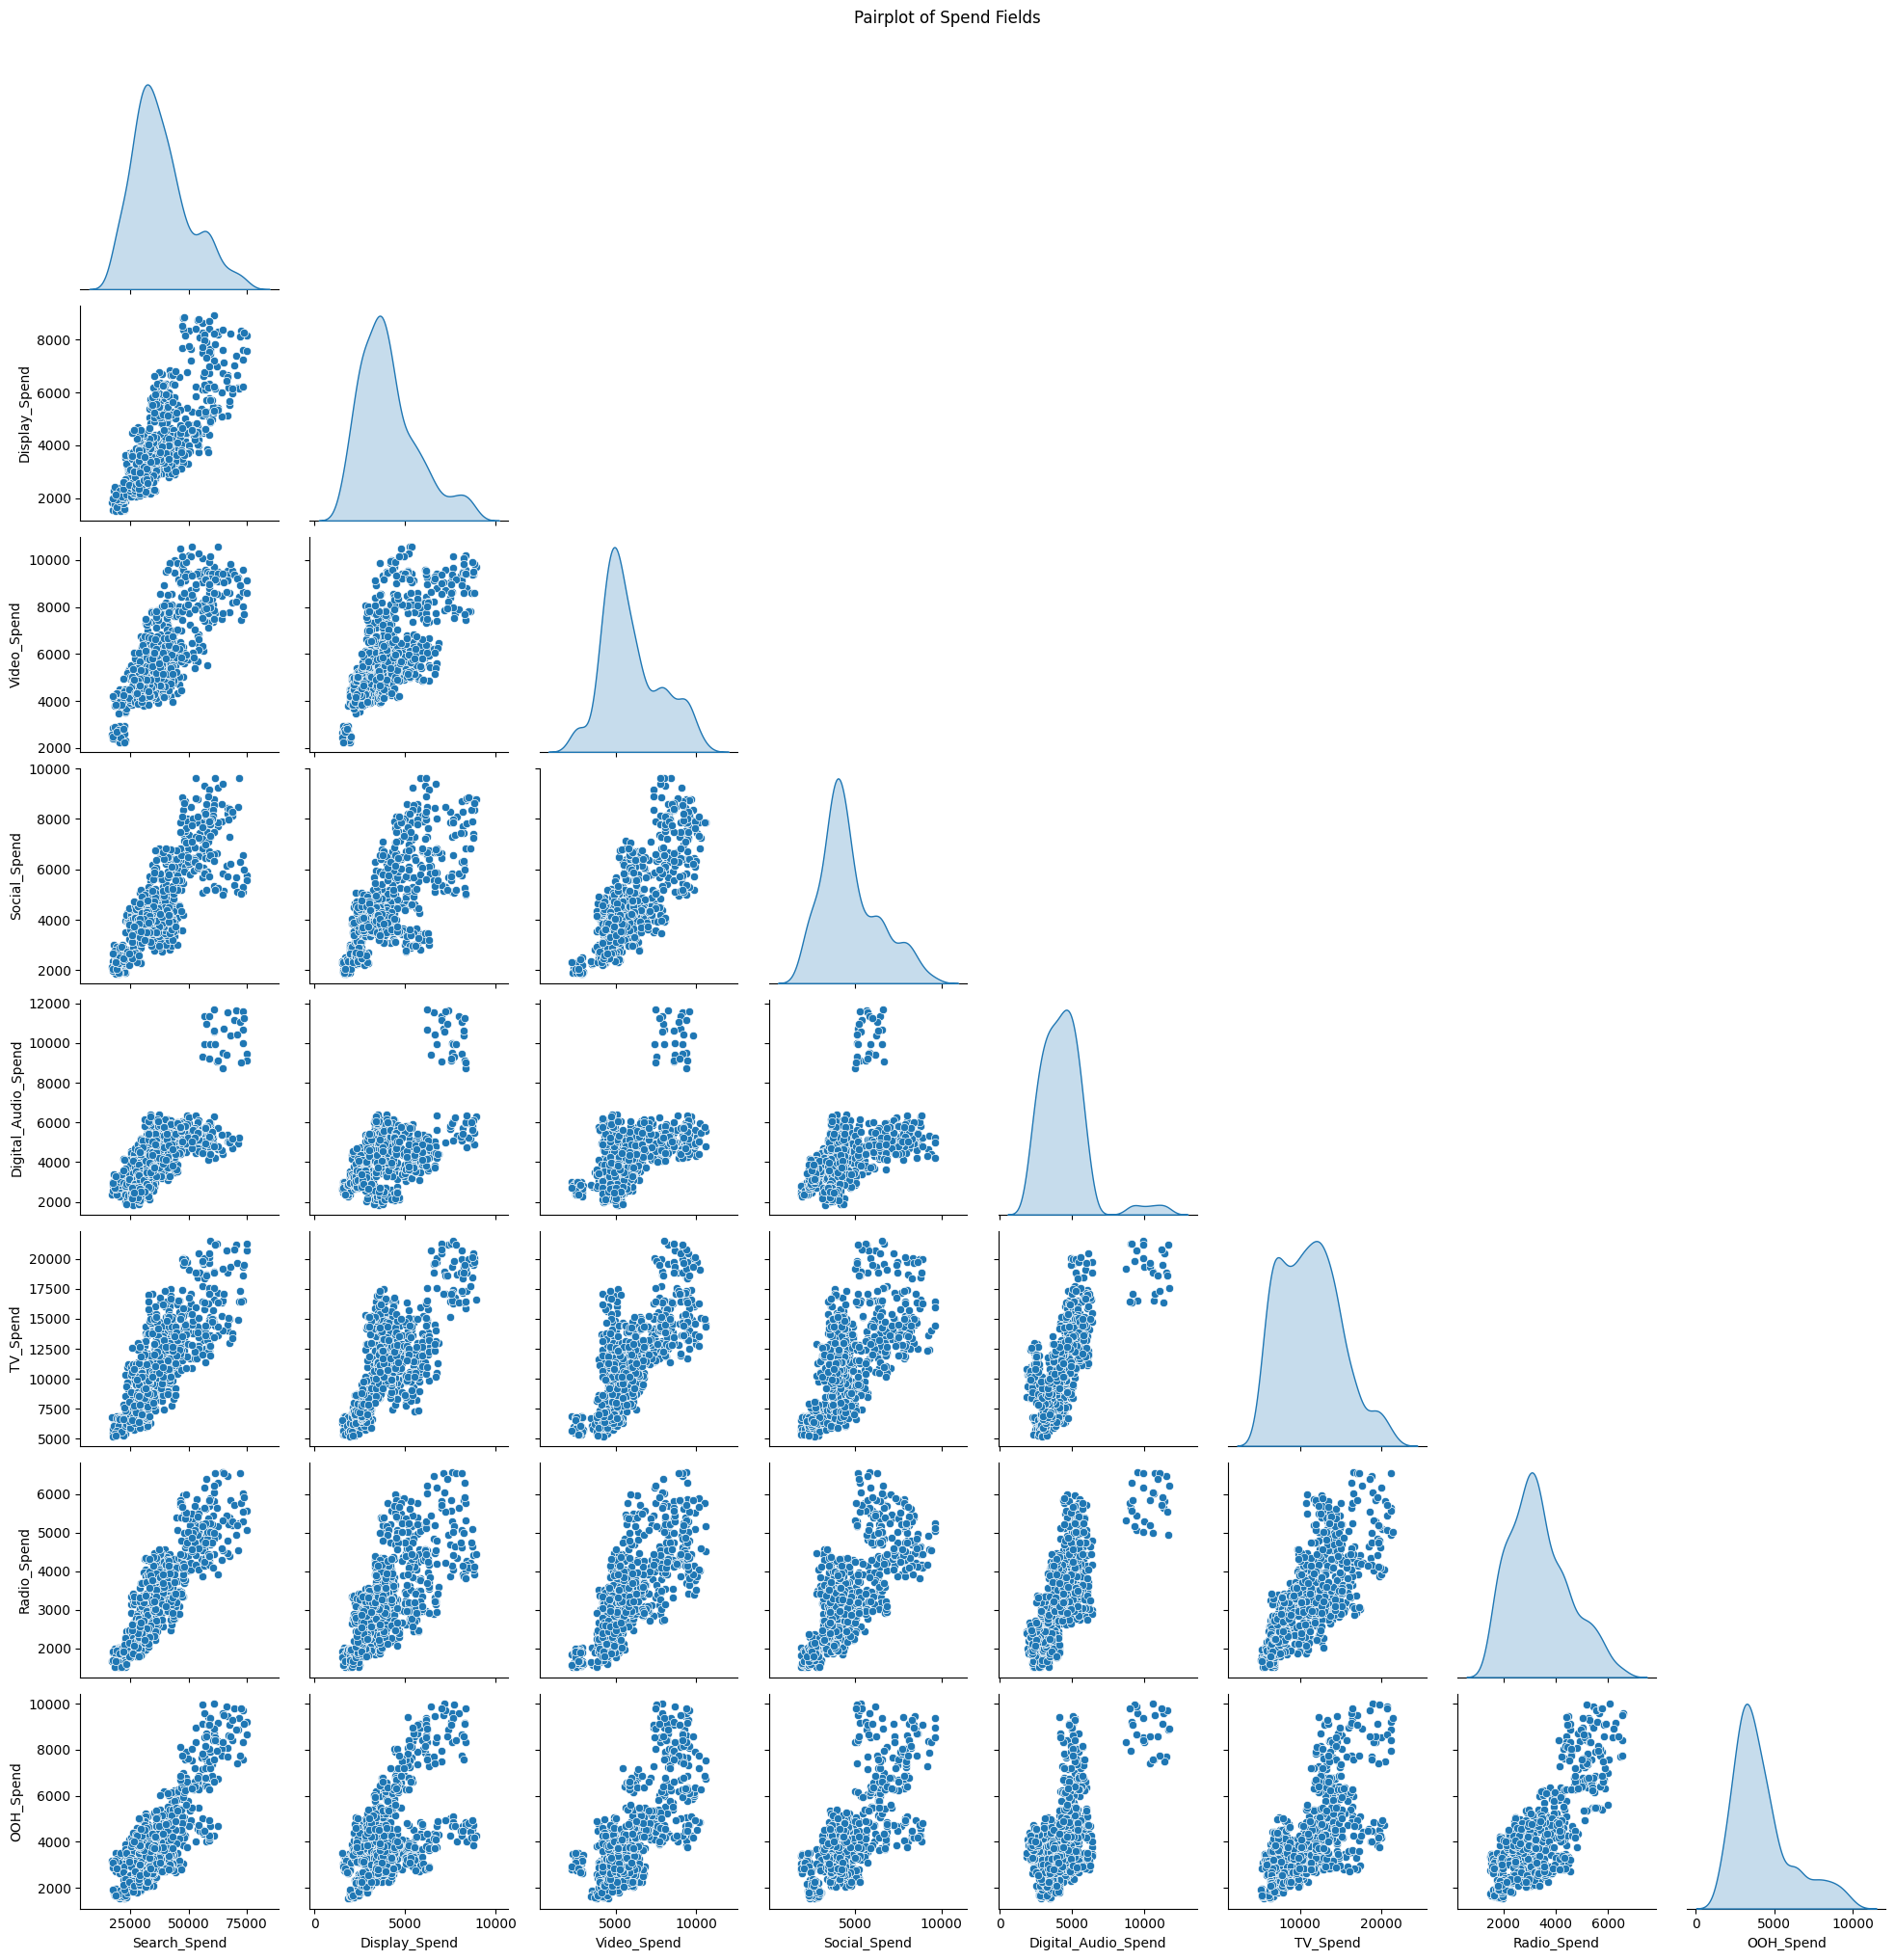

In [11]:
# Checking correlation & distribution

# Filter columns that contain 'Spend' in their names
spend_columns = [col for col in daily.columns if "Spend" in col]

# Create pairplot
sns.pairplot(daily[spend_columns], diag_kind="kde", corner=True, height=2.5)

# Show the plot
plt.suptitle("Pairplot of Spend Fields", y=1.02)
plt.show()

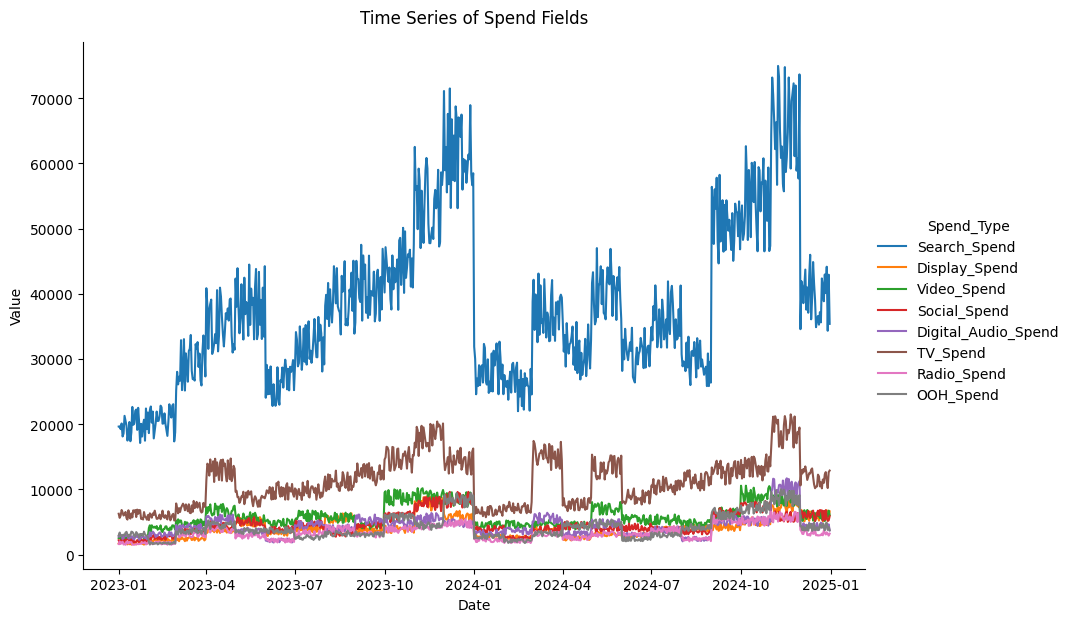

In [12]:
# Filter columns that include "Spend"
spend_columns = [col for col in daily.columns if "Spend" in col]

# Melt the DataFrame for Seaborn
daily_melted = daily.melt(id_vars="Date", value_vars=spend_columns, var_name="Spend_Type", value_name="Value")

# Plot each "Spend" field vs Date
sns.relplot(data=daily_melted, x="Date", y="Value", hue="Spend_Type", kind="line", height=6, aspect=1.5)

# Show the plot
plt.title("Time Series of Spend Fields", y=1.02)
plt.show()

## All Data Tables for MMM Work ##

In [13]:
# All tables that can be further used for MMM Building & Dashboarding for insights

external_factors.head() # Data for external trends such as inflation rate, CPI
spend_factors.head() # Data for coefficients for spend levels per marketing channel
factors.head() # concatenated table of both tables above
daily.head() # date-level data table containing all the data above with the spend levels

,Date,Month,Year,Weekday,Trend_Factor,Promo_Exists,Consumer_Index,Inflation_Rate,Budget_Factor,Search_Factor,...,GRP_Factor,Search_Spend,Display_Spend,Video_Spend,Social_Spend,Digital_Audio_Spend,TV_Spend,Radio_Spend,OOH_Spend,Gross_Rating_Point
0,2023-01-01,1,2023,6,1.05,0,110.7,8.7,1255847,0.45,...,66,19639.542819,1725.972734,2539.700617,2198.089328,2775.161082,6269.326833,1620.334093,2938.116813,69.3
1,2023-01-02,1,2023,0,1.05,0,110.7,8.7,1255847,0.45,...,66,19675.623941,1640.317490,2914.134814,1875.346559,2774.473190,5638.698014,2014.291496,3379.498704,69.3
2,2023-01-03,1,2023,1,1.05,0,110.7,8.7,1255847,0.45,...,66,19249.161833,1937.997508,2374.755734,2071.010386,2913.496932,5981.028899,1626.827970,2934.274363,69.3
3,2023-01-04,1,2023,2,1.05,0,110.7,8.7,1255847,0.45,...,66,20109.647060,1930.031875,2254.736541,2313.098176,2996.424570,6841.996507,1854.610450,2808.181076,69.3
4,2023-01-05,1,2023,3,1.05,0,110.7,8.7,1255847,0.45,...,66,18116.704867,1859.123509,2706.371752,2295.736714,2394.118720,6488.356951,1982.546859,2994.581752,69.3


In [14]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  731 non-null    datetime64[ns]
 1   Month                 731 non-null    int64         
 2   Year                  731 non-null    int64         
 3   Weekday               731 non-null    int64         
 4   Trend_Factor          731 non-null    float64       
 5   Promo_Exists          731 non-null    int64         
 6   Consumer_Index        731 non-null    float64       
 7   Inflation_Rate        731 non-null    float64       
 8   Budget_Factor         731 non-null    int64         
 9   Search_Factor         731 non-null    float64       
 10  Display_Factor        731 non-null    float64       
 11  Video_Factor          731 non-null    float64       
 12  Social_Factor         731 non-null    float64       
 13  Digital_Audio_Factor